In [1]:
import sys 
import os 
import numpy as np

nb_dir = os.getcwd()
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from plotlib.loaders import *
from plotlib.plotters import *

from phdconf import config 
from phdconf.config import *

%matplotlib inline

In [2]:
queries = load_queries(config.AUS_TOPIC_PATH)

In [3]:
BASE_DIR = os.path.join(os.environ["HOME"], 'phd-generated')

In [4]:
index_names = ['case-topics']
qrel_paths = [config.AUS_QREL_PATH] * len(index_names)
rel_levels = [config.AUS_REL_LEVEL] * len(index_names)
# display_names = ['base', 'sec-count', 'leg-count', 'date', 'hierarchy']

topics = 'case-topics'

In [5]:
mu = 1050
base_df = load_1d_dfs(['filtered-phrasestop'], qrel_paths, os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior'), 'case-topics-{0}-unigram_dir_mu_{1:.2f}.run', rel_levels, mu, mu, 1)[0][0]
base_qry = load_1d_dfs(['filtered-phrasestop'], qrel_paths, os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior'), 'case-topics-{0}-unigram_dir_mu_{1:.2f}.run', rel_levels, mu, mu, 1, per_query=True)[0][0]

In [6]:
# ['tmp.run']
results = []
for n in range(1, 6):
    results.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', [os.path.join('/home/danlocke/go/src/github.com/dan-locke/phd/prf', 'case-topics-prf-text-docs-'+str(n)+'-terms-{0}.run'.format(x)) for x in range(1, 11)]))

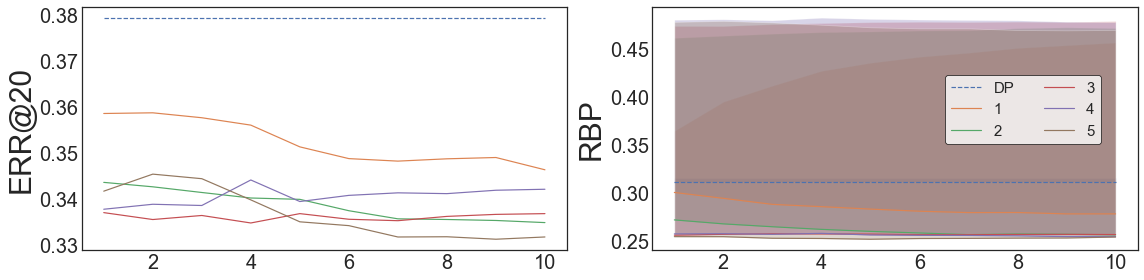

In [17]:
doc_fig = plot_single_orientation(['DP']+[x for x in range(1, 6)], RERANK_METRICS, [[base_df for x in range(10)]]+results, 1, 10, 1, legend_x=0.965, legend_y=0.75, styles=['--'], legend=True, alpha=0.3)

In [18]:
doc_fig.savefig('figures/rm1-docs.pdf')

In [20]:
inter = Interpolater(os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior', 'case-topics-filtered-phrasestop-unigram_dir_mu_1050.00.run'), normalize=True)

dfs = []
for x in [os.path.join('/home/danlocke/go/src/github.com/dan-locke/phd/prf', 'case-topics-prf-text-docs-1-terms-{0}.run'.format(x)) for x in range(1, 11)]: 
    interped_dfs = []
    for _lambda in np.arange(0, 1.0, 0.01):
        inter.interpolate(x, _lambda, 'tmp.run')
        interped_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'])[0])
    dfs.append(interped_dfs)

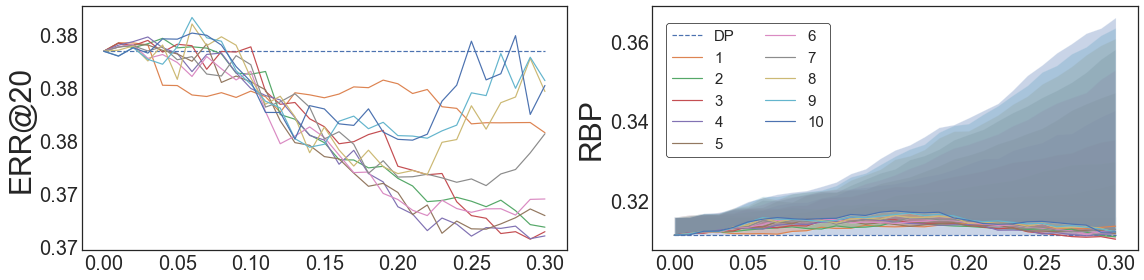

In [30]:
to = 30
term_interp_fig = plot_single_orientation(['DP']+[x for x in range(1, 11)], RERANK_METRICS, [[base_df for x in range(to+1)]] + [x[:to+1] for x in dfs], 0.00, (to)/100, 0.01, legend_x=0.73, legend_y=0.93, legend=True, styles=['--'])

In [31]:
term_interp_fig.savefig('figures/rm3.pdf')

In [12]:
names = [x for x in range(1, 11)]
max_1_doc = select_1d_max_with_interp(names, dfs, 0.0, 0.01, '$\lambda$', inter, base_qry, base_df, 1050, os.path.join('/home/danlocke/go/src/github.com/dan-locke/phd/prf', 'case-topics-prf-text-docs-1-terms-{0}.run'), config.AUS_QREL_PATH, config.AUS_REL_LEVEL, metrics=metrics).T

In [13]:
print(max_1_doc.drop(['Unjudged@20'], axis='columns').to_latex(escape=False))

\begin{tabular}{lllllll}
\toprule
     &   &       RR &   ERR@20 &     R@20 &     NDCG &           RBP \\
\midrule
1 & $\lambda$ &     0.02 &     0.01 &     0.08 &     0.19 &          0.22 \\
     & - &   0.5687 &   0.3797 &   0.4744 &   0.4625 &        0.3142 \\
2 & $\lambda$ &     0.06 &     0.04 &     0.03 &     0.11 &          0.15 \\
     & - &   0.5698 &   0.3799 &   0.4718 &   0.4629 &        0.3146 \\
3 & $\lambda$ &     0.05 &     0.03 &     0.03 &     0.41 &          0.15 \\
     & - &   0.5700 &   0.3798 &   0.4733 &   0.4639 &        0.3152 \\
4 & $\lambda$ &     0.04 &     0.03 &     0.03 &     0.46 &          0.12 \\
     & - &   0.5700 &   0.3799 &   0.4733 &   0.4627 &  0.3158$^{*}$ \\
5 & $\lambda$ &     0.04 &     0.07 &     0.03 &     0.43 &          0.09 \\
     & - &   0.5694 &   0.3796 &   0.4704 &   0.4633 &        0.3153 \\
6 & $\lambda$ &     0.04 &     0.02 &     0.03 &     0.42 &          0.10 \\
     & - &   0.5692 &   0.3796 &   0.4691 &   0.4642 &        0

In [14]:
# ['tmp.run']
fixed_lambda = 0.1
results = []
for n in range(1, 6):
    res = []
    for k in range(1, 11):
        inter.interpolate(os.path.join('/home/danlocke/go/src/github.com/dan-locke/phd/prf', 'case-topics-prf-text-docs-{0}-terms-{1}.run'.format(n, k)), fixed_lambda, 'tmp.run')
        res.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'])[0])
    results.append(res)              

In [15]:
interp_fig = plot_tune_1d_comp(['base']+[x for x in range(1, 6)], metrics, [[base_df for x in range(10)]]+results, 1, 10, 1, legend_x=0.965, ylims=ylims, styles=['--'])

<Figure size 1152x432 with 6 Axes>

In [16]:
interp_fig.savefig('figures/ausnl-prf-fixed-interp.pdf')

In [17]:
emb_type = 'max'
emb_results = []
for k in range(1, 11):
    res = []
    for _lambda in np.arange(0, 1.0, 0.01):
        inter.interpolate(os.path.join('/home/danlocke/go/src/github.com/dan-locke/phd/embedding-prf', 'case-topics-skip-emb-{0}-expterms-{1}.run'.format(emb_type, k)), _lambda, 'tmp.run')
        res.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'])[0])
    emb_results.append(res)              

In [18]:
to = 40
interp_fig = plot_tune_1d_comp(['base']+[x for x in range(1, 11)], metrics, [[base_df for x in range(to+1)]]+[x[:to+1] for x in emb_results], 0, to/100, 0.01, legend_x=0.965, ylims=ylims, styles=['--'])
interp_fig.savefig('figures/ausnl-emb-interp.pdf')

<Figure size 1152x432 with 6 Axes>

In [19]:
tt_folds = read_folds('ausnl-folds.txt')

In [20]:
grid_dir = os.path.join(os.environ["HOME"], "go/src/gridsearch")

models = ['sum', 'mnz', 'max', 'centroid']
ets = ['cbow', 'skip']

names = ['rm3']#, '5feat']#, '6feat']
for e in ets: 
    for m in models: 
        names.append('{0}-{1}'.format(e, m))
        names.append('rm3-{0}-{1}'.format(e, m))

grid_name = os.path.join(grid_dir, '{0}-{1}-combine-max.run')
scores = {}
run_res = {}
for name in names:
    run_res[name] = {}
    scores[name] = {}
    for m, metric in zip(['RR', 'ERR', 'R@20', 'NDCG', 'RBP'], metrics):
        run = load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', [grid_name.format(name, m)], per_query=True)[0]
        run_res[name][metric] = run[metric]
        scores[name][metric] = run[metric].mean()

In [21]:
from scipy import stats 

base_qry.sort_index(inplace=True)

stat = {}
for name, rr in scores.items():
    stat[name] = {}
    for metric, score in rr.items():
        run_res[name][metric].sort_index(inplace=True)
        p = stats.ttest_rel(run_res[name][metric], base_qry[metric]).pvalue
        m = base_qry[metric].mean()
        if p < 0.01:
             stat[name][metric] = '{0:.4f}'.format((score)) + "$^{**}$"
        elif p < 0.05: 
            stat[name][metric] = '{0:.4f}'.format((score)) + "$^{*}$"
        else:
            stat[name][metric] = '{0:.4f}'.format((score))

In [22]:
df = pd.DataFrame(stat).T

In [23]:
df.loc['$R$'] = base_df[metrics].round(4)
df = df.rename(index={'rm3': 'RM3'})
df = df.reindex(['$R$', 'RM3', 'cbow-centroid', 'cbow-sum', 'cbow-max', 'cbow-mnz', 
                 'rm3-cbow-centroid', 'rm3-cbow-sum', 'rm3-cbow-max', 'rm3-cbow-mnz',
                'skip-centroid', 'skip-sum', 'skip-max', 'skip-mnz',
                'rm3-skip-centroid', 'rm3-skip-sum', 'rm3-skip-max', 'rm3-skip-mnz'])
df
write_table('tables/emb-expansion', bold_max(df).rename(columns=metrics).to_latex(escape=False))

In [24]:
ntlm_emb = ['all-paras-lower-100-skip-minoccur-50', 'all-paras-lower-100-cbow-minoccur-50', 'filtered-wiki-news-300d-1M']
abbrev = ['skip', 'cbow', 'generic']
ntlm_runs = []
for emb, ab in zip(ntlm_emb, abbrev):
    ntlm_names = [os.path.join('/home/danlocke/phd-generated/expansion/tlm', 'case-topics-filtered-phrasestop-{0}-tlm-dir-mu-1050.00-neighbours-{1}.run'.format(emb, x)) for x in range(1, 21)]
    ntlm_runs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ntlm_names, per_query=True))


In [25]:
tt_folds = read_folds('ausnl-folds.txt')

In [26]:
ntlm_df = pd.DataFrame(columns=metrics)

for ab, runs in zip(abbrev, ntlm_runs):
    cross = cross_validation(runs, tt_folds, metrics, base_qry)
    ntlm_df.loc[ab] = cross[0]
    
ntlm_df.loc['$R$'] = base_df.round(4)
ntlm_df = ntlm_df.reindex(['$R$', 'skip', 'cbow', 'generic'])

In [27]:
write_table('tables/ntlm-emb-type', bold_max(ntlm_df).rename(columns=metrics).drop('Unjudged@20',axis='columns').to_latex(escape=False))

In [28]:
ntlm_fig = plot_tune_1d_comp(['base'] + abbrev, metrics, [[base_df for x in range(20)]] + [[x.mean() for x in y] for y in ntlm_runs], 1, 20, 1, legend_x=0.965, legend_y=0.2, styles=['--'], ylims=ylims)
ntlm_fig.savefig('figures/ausnl-ntlm.pdf')

<Figure size 1152x432 with 6 Axes>

In [29]:
# [x.mean() for x in ntlm_runs[0]]

In [30]:
best_qry = load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', [grid_name.format(x, 'RBP') for x in ['cbow-centroid', 'skip-max']], per_query=True)

In [31]:
(best_qry[1]-base_qry).sort_values('rbp@0.80')[:5]

,recip_rank,unjudged@20,recall_20,recall_100,ndcg,set_P,set_recall,set_F_.5,rbp@0.10,rbp-res@0.10,rbp@0.50,rbp-res@0.50,rbp@0.80,rbp-res@0.80,err@20
57,0.0000,3.0,-0.0455,0.0,-0.0205,0.0,0.0,0.0,-0.0909,0.0,-0.3086,0.0159,-0.2208,0.0847,-0.01805
78,0.0000,3.0,-0.0714,0.0,-0.0305,0.0,0.0,0.0,-0.0008,0.0,-0.0436,0.0040,-0.0973,0.0546,-0.01558
77,0.0000,2.0,-0.0810,0.0,-0.0362,0.0,0.0,0.0,0.0000,0.0,-0.0053,0.0049,-0.0943,0.0723,0.03270
8,-0.1500,2.0,-0.5000,0.0,-0.1037,0.0,0.0,0.0,-0.0009,0.0,-0.0615,0.0000,-0.0788,0.0072,-0.13701
45,-0.6667,0.0,0.0000,0.0,-0.3065,0.0,0.0,0.0,-0.8910,0.0,-0.3750,0.0000,-0.0720,-0.0016,-0.58333
